In [ ]:
# Name: Lilli Nappi
# CWID: 20006502
# HW02_EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1-Load the "breast-cancer-wisconsin.data.csv" from canvas into R/Python and perform the EDA analysis

I. Summarizing each column (e.g. min, max, mean)

In [6]:
# Load the data into a pandas dataframe

# df = pd.read_csv('your_data.csv', dtype={'column_name1': 'int64', 'column_name2': 'float64', 'column_name3': 'str'})

df = pd.read_csv('breast-cancer-wisconsin.csv')

print(df.describe())




             Sample          F1          F2          F3          F4  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               F5          F7          F8          F9       Class  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

II. Identifying missing values

In [59]:
# Find column with at least one NaN
#missing_values = df.isnull().any()
df = df.replace([''], None)
missing_values = df.isnull().any()
print(missing_values)


Sample    False
F1        False
F2        False
F3        False
F4        False
F5        False
F6         True
F7        False
F8        False
F9        False
Class     False
dtype: bool


III. Replacing the missing values with the "mean" of the column

In [62]:
# # # Replace missing values with the mean of the column
df = df.apply(pd.to_numeric, errors='coerce')
df['F6'].fillna(df['F6'].mean(),inplace=True)
df.fillna(df.mean(), inplace=True)
print("\n check for missing value again")
missing_values = df.isnull().any()
print(missing_values)



 check for missing value again
Sample    False
F1        False
F2        False
F3        False
F4        False
F5        False
F6        False
F7        False
F8        False
F9        False
Class     False
dtype: bool


<ipython-input-62-69f43290013b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(df['F6'].mean(),inplace=True)


IV.	Displaying the frequency table of Class vs. F6


In [63]:
#IV.	Displaying the frequency table of Class vs. F6
freq_table = pd.crosstab(df['Class'], df['F6'])
print(freq_table)

F6     1.000000   2.000000   3.000000   3.544656   4.000000   5.000000   \
Class                                                                     
2            387         21         14         14          6         10   
4             15          9         14          2         13         20   

F6     6.000000   7.000000   8.000000   9.000000   10.000000  
Class                                                         
2              0          1          2          0          3  
4              4          7         19          9        129  


V. Displaying the Scatter Plot of F1 to F6, one pair at a time

In [64]:
%matplotlib inline

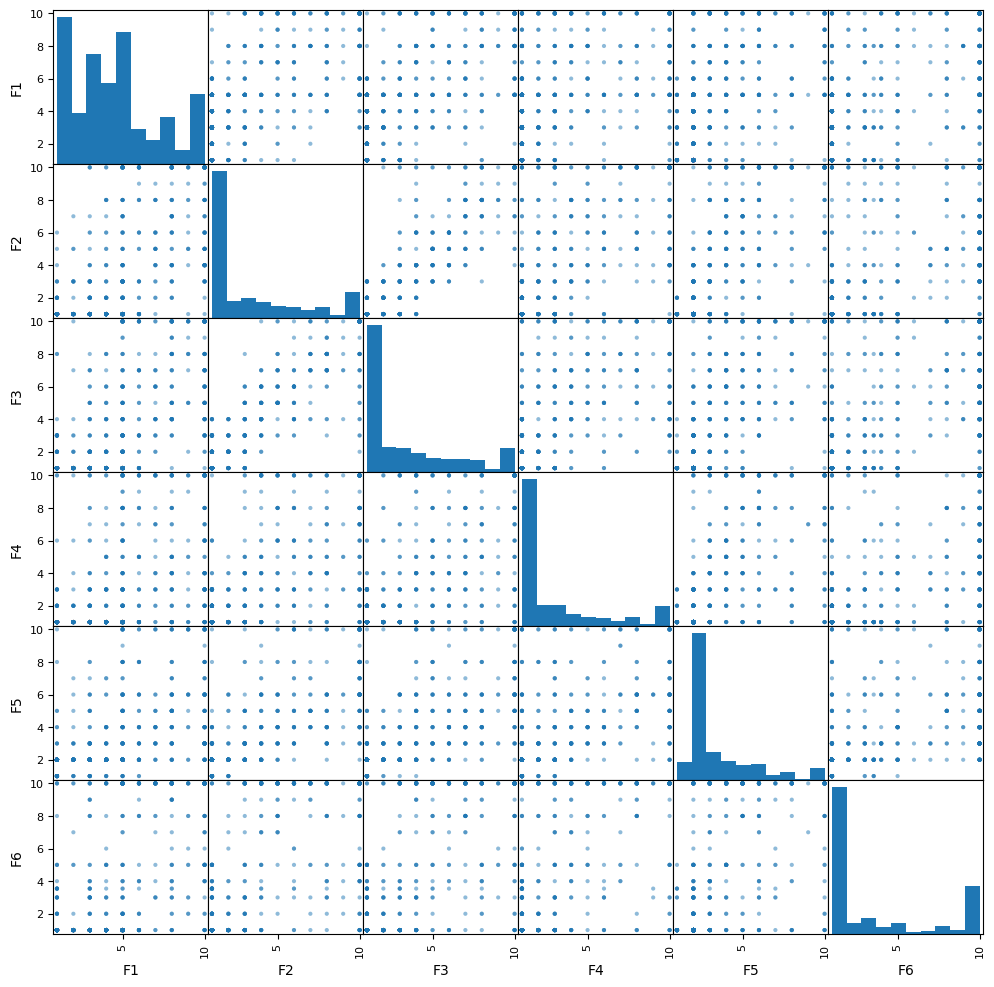

In [65]:
# # Displaying the scatter plot of F1 to F6, one pair at a time
# # Create scatter plot matrix

pd.plotting.scatter_matrix(df.loc[:, 'F1':'F6'], figsize=(12,12), diagonal='hist')

# Show plot
plt.show()

VI. Show Histogram box plot for columns F7 to F9

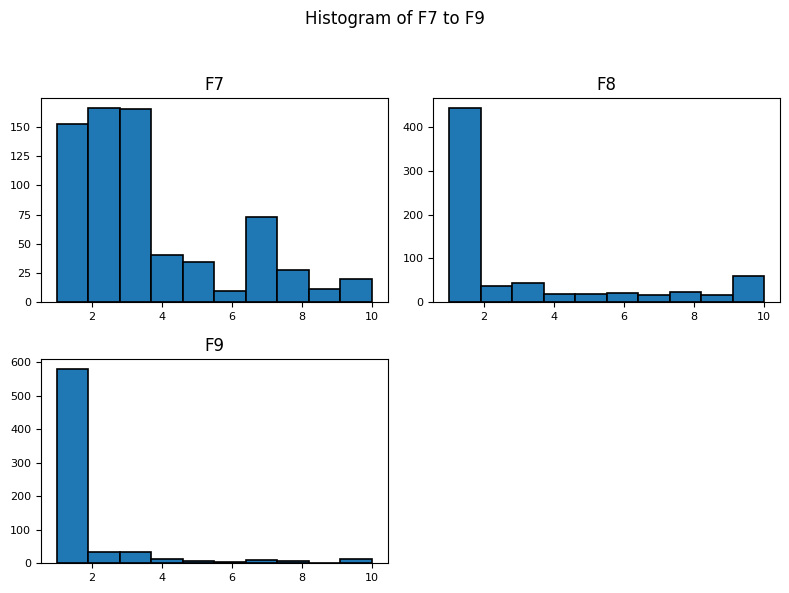

In [66]:
# Select columns
subset = df.loc[:, 'F7':'F9']

# Create a histogram
subset.hist(grid=False, bins=10, edgecolor="black", linewidth=1.2, xlabelsize=8, ylabelsize=8, figsize=(8, 6))
plt.suptitle("Histogram of F7 to F9", fontsize=12)
plt.tight_layout(rect=(0,0,1,0.95))
plt.show()


In [67]:

#Reload the “breast-cancer-wisconsin.data.csv”
#Remove any row with a missing value in any of the columns.
df = pd.read_csv('breast-cancer-wisconsin.csv')
df.dropna(inplace=True) # drop rows with missing values
print(df.isnull().any()) # check all rows are FALSE and have no missing values


Sample    False
F1        False
F2        False
F3        False
F4        False
F5        False
F6        False
F7        False
F8        False
F9        False
Class     False
dtype: bool
